In [67]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from pprint import pprint
from pathlib import Path

In [68]:
#Raw data file
data_folder_in = (Path("/01_Data_Analytics/Git_Clones/Project1_Group1/\
Resources/"))
file_to_open = data_folder_in / "mortgage_interest_rates.xls"

#Read purchasing file and store into pandas data frame
df_rates = pd.read_excel(file_to_open)

In [69]:
df_rates.head()

,Week,U.S. 30 yr FRM,30 yr fees & points,U.S. 15 yr FRM,15 yr fees & points,U.S. 5/1 ARM,5/1 ARM fees & points,U.S. 5/1 ARM margin,30 yr FRM/ 5/1 ARM spread
0,1971-04-02,7.33,,NaN,NaN,NaN,NaN,NaN,NaN
1,1971-04-09,7.31,,NaN,NaN,NaN,NaN,NaN,NaN
2,1971-04-16,7.31,,NaN,NaN,NaN,NaN,NaN,NaN
3,1971-04-23,7.31,,NaN,NaN,NaN,NaN,NaN,NaN
4,1971-04-30,7.29,,NaN,NaN,NaN,NaN,NaN,NaN


[(0, 20),
 Text(0,0.5,'Interest Rate %'),
 (719619.0, 736929.0),
 Text(0.5,0,'Year'),
 Text(0.5,1,'30 yr FRM Mortgage Interest Rates by Year')]

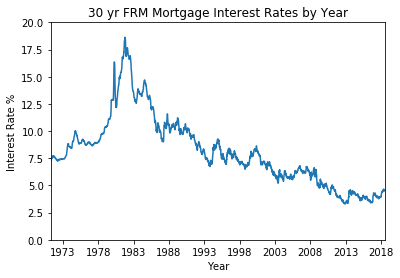

In [70]:
# Create fig and ax
fig = plt.figure()
ax = plt.axes()

# Use plot, not scatterplot, for efficiency and performance
ax.plot(df_rates['Week'], df_rates['U.S. 30 yr FRM'],  ls = '-')

ax.set(title = '30 yr FRM Mortgage Interest Rates by Year', 
       ylabel = 'Interest Rate %', 
       xlabel = 'Year', 
       ylim = (0, 20),
       xlim = ('4/2/1971', '8/23/2018'))

In [84]:
#Raw data file
data_folder_in = (Path("/01_Data_Analytics/Git_Clones/Project1_Group1/\
Resources/"))
file_to_open = data_folder_in / "house_hold_report.xlsx"

with pd.ExcelFile(file_to_open) as xls:
    df_debt = pd.read_excel(xls, 'Page 3 Data', skiprows = [0,1])
    df_account = pd.read_excel(xls, 'Page 4 Data', skiprows = [0,1,2])
    df_credit = pd.read_excel(xls, 'Page 6 Data', skiprows = [0,1,2])
    df_90 = pd.read_excel(xls, 'Page 12 Data', skiprows = [0,1,2])
    df_new = pd.read_excel(xls, 'Page 13 Data', skiprows = [0,1])
    df_foreclose = pd.read_excel(xls, 'Page 17 Data', skiprows = [0,1])
    df_state90 = pd.read_excel(xls, 'Page 24 Data', skiprows = [0,1])
    

In [91]:
df_debt = df_debt.drop(df_debt.columns[[1,2]], axis = 1)
df_debt = df_debt.rename(columns={'Unnamed: 0':'Type'})

df_debt.head()

,Type,03:Q3,03:Q4,04:Q1,04:Q2,04:Q3,04:Q4,05:Q1,05:Q2,05:Q3,...,16:Q1,16:Q2,16:Q3,16:Q4,17:Q1,17:Q2,17:Q3,17:Q4,18:Q1,18:Q2
0,Mortgage,5.1830,5.6600,5.8400,5.9670,6.210,6.3600,6.5120,6.6960,6.9060,...,8.369,8.362,8.350,8.480,8.627,8.691,8.743,8.882,8.939,8.999
1,HE Revolving,0.2690,0.3020,0.3280,0.3670,0.426,0.4680,0.5020,0.5280,0.5410,...,0.485,0.478,0.472,0.473,0.456,0.452,0.448,0.444,0.436,0.432
2,Auto Loan,0.6840,0.7040,0.7200,0.7430,0.751,0.7280,0.7250,0.7740,0.8300,...,1.071,1.103,1.135,1.157,1.167,1.190,1.213,1.221,1.229,1.238
3,Credit Card,0.6930,0.6980,0.6950,0.6970,0.706,0.7170,0.7100,0.7170,0.7320,...,0.712,0.729,0.747,0.779,0.764,0.784,0.808,0.834,0.815,0.829
4,Student Loan,0.2488,0.2529,0.2598,0.2629,0.330,0.3457,0.3636,0.3744,0.3777,...,1.261,1.259,1.279,1.310,1.344,1.344,1.357,1.378,1.407,1.405


In [73]:
df_account.head()

,Unnamed: 0,03:Q1,03:Q2,03:Q3,03:Q4,04:Q1,04:Q2,04:Q3,04:Q4,05:Q1,...,16:Q1,16:Q2,16:Q3,16:Q4,17:Q1,17:Q2,17:Q3,17:Q4,18:Q1,18:Q2
0,Auto Loan,73.51,70.76,75.94,77.64,79.22,80.73,81.70,78.48,78.50,...,100.47,103.08,104.98,106.21,106.66,108.11,109.69,110.19,110.90,111.51
1,Credit Card,469.81,468.94,457.64,452.71,449.62,458.26,447.07,448.43,451.95,...,435.61,440.98,445.04,453.07,454.58,459.31,465.97,468.76,466.88,469.64
2,Mortgage,79.54,79.73,79.34,83.42,83.95,84.74,84.87,85.30,85.56,...,81.06,80.40,79.68,79.90,80.11,80.08,79.65,79.99,79.90,79.72
3,HE Revolving,13.41,14.22,15.55,16.10,16.73,17.66,19.75,20.84,21.91,...,16.62,16.59,16.47,16.26,15.89,15.86,15.76,15.68,15.76,15.62
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
df_credit.head()

,Unnamed: 0,<620,620-659,660-719,720-759,760+,Zero,Unnamed: 7,TOTAL,Unnamed: 9,Unnamed: 10
0,03:Q1,72.19,68.12,188.33,336.10,304.24,0,NaN,968.98,NaN,NaN
1,03:Q2,71.41,70.53,203.73,352.85,316.03,0,NaN,1014.55,NaN,NaN
2,03:Q3,78.15,81.23,215.70,363.92,324.71,0,NaN,1063.71,NaN,NaN
3,03:Q4,90.06,86.37,212.36,349.56,289.70,0,NaN,1028.05,NaN,NaN
4,04:Q1,79.29,63.47,150.00,213.45,150.59,0,NaN,656.80,NaN,NaN


In [75]:
df_90.head()

,Unnamed: 0,2003-03-01 00:00:00,2003-06-01 00:00:00,2003-09-01 00:00:00,2003-12-01 00:00:00,2004-03-01 00:00:00,2004-06-01 00:00:00,2004-09-01 00:00:00,2004-12-01 00:00:00,2005-03-01 00:00:00,...,16:Q1,16:Q2,16:Q3,16:Q4,17:Q1,17:Q2,17:Q3,17:Q4,18:Q1,18:Q2
0,MORTGAGE,1.210000,1.140000,1.100000,1.060000,1.010000,1.0000,1.080000,1.080000,1.010000,...,2.08,1.76,1.63,1.57,1.67,1.47,1.38,1.27,1.22,1.11
1,HELOC,0.350000,0.280000,0.220000,0.310000,0.210000,0.1500,0.180000,0.210000,0.250000,...,2.19,1.96,2.03,2.13,2.06,1.88,1.53,1.67,1.51,1.56
2,AUTO,2.330000,2.260000,2.160000,2.160000,2.320000,2.1700,2.270000,2.420000,2.380000,...,3.52,3.46,3.58,3.75,3.82,3.92,3.97,4.05,4.26,4.17
3,CC,8.840000,8.900000,8.670000,9.240000,9.270000,8.8500,8.650000,9.180000,9.590000,...,7.60,7.17,7.08,7.14,7.45,7.38,7.47,7.55,8.01,7.88
4,STUDENT LOAN,6.129123,6.137217,6.269695,6.231594,6.336297,6.3752,6.496061,6.321377,6.032453,...,11.04,11.06,10.94,11.17,10.98,11.22,11.17,10.96,10.66,10.94


In [76]:
df_new.head()

,Unnamed: 0,03:Q1,03:Q2,03:Q3,03:Q4,04:Q1,04:Q2,04:Q3,04:Q4,05:Q1,...,16:Q1,16:Q2,16:Q3,16:Q4,17:Q1,17:Q2,17:Q3,17:Q4,18:Q1,18:Q2
0,AUTO,8.57016,8.49743,8.0335,7.79202,7.41831,7.29414,7.18961,6.97921,6.78062,...,7.26828,7.27623,7.35342,7.46124,7.34804,7.45,7.39,7.21,7.28,7.15
1,CC,12.3216,12.2716,11.7391,11.5608,10.8937,10.478,10.1992,9.85342,9.35402,...,5.14744,5.07259,5.14853,5.51916,5.90442,6.19,6.33,6.33,6.42,6.40
2,MORTGAGE,5.38337,5.54307,5.272,5.27006,5.0531,5.07177,4.99843,4.87749,4.74766,...,3.70203,3.42747,3.43151,3.38486,3.51405,3.61,3.46,3.40,3.38,3.41
3,HELOC,2.94296,2.67734,2.52581,2.02547,1.93356,1.98288,1.84443,2.07571,2.14226,...,2.38625,3.17222,2.95138,2.72836,2.52409,1.75,2.11,2.05,2.22,2.26
4,STUDENT LOAN,NaN,NaN,NaN,NaN,7.60962,7.20012,7.27877,7.61019,8.17166,...,10.1633,9.87753,9.88235,9.79822,9.99805,10.13,10.02,9.61,9.18,8.84


In [77]:
df_foreclose.head()

,Unnamed: 0,03:Q1,03:Q2,03:Q3,03:Q4,04:Q1,04:Q2,04:Q3,04:Q4,05:Q1,...,16:Q1,16:Q2,16:Q3,16:Q4,17:Q1,17:Q2,17:Q3,17:Q4,18:Q1,18:Q2
0,foreclosure,203.32,169.90,178.16,193.24,186.06,171.44,168.80,184.14,171.52,...,96.82,82.84,80.62,78.92,90.66,84.82,69.58,69.16,76.48,75.54
1,bankruptcy,612.26,628.66,542.44,516.02,534.90,579.32,530.52,572.92,462.08,...,206.90,224.42,213.30,204.16,203.44,224.02,208.44,200.40,191.54,224.90
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Return to Table of Contents,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
df_state90.head()

,Unnamed: 0,03:Q1,03:Q2,03:Q3,03:Q4,04:Q1,04:Q2,04:Q3,04:Q4,05:Q1,...,16:Q1,16:Q2,16:Q3,16:Q4,17:Q1,17:Q2,17:Q3,17:Q4,18:Q1,18:Q2
0,AZ,1.634965,1.357124,1.615372,1.405617,0.946504,0.737215,1.205548,0.910631,0.669514,...,1.89,1.68,1.54,1.71,1.27,0.76,0.85,0.89,0.65,0.52
1,CA,0.594722,0.362121,0.431873,0.382749,0.319836,0.232252,0.393409,0.311792,0.335647,...,1.10,0.97,0.73,0.90,0.96,0.71,0.77,0.65,0.56,0.53
2,FL,1.306590,1.505672,0.985858,0.995216,0.944330,0.799080,0.696809,0.634069,0.635903,...,3.67,3.39,3.04,2.67,3.06,2.88,2.23,1.52,1.99,2.44
3,IL,1.288175,1.569822,1.302861,1.451363,1.275507,1.197390,1.471748,1.522767,1.296723,...,1.95,2.14,1.79,2.12,1.85,1.77,1.53,1.15,1.36,1.15
4,MI,1.506623,1.383357,1.288604,1.232355,1.131415,1.471006,1.899565,1.755111,1.696966,...,1.46,1.01,1.00,1.12,1.05,0.58,0.94,0.94,0.63,0.67
